<a href="https://colab.research.google.com/github/Alamgir-JUST/TACNet/blob/main/Coding/TACNet_with_CICIDS2018_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
# Set font size and family for the entire figure
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Dataset**

In [ ]:
import os

# Step 2: Define the dataset directory (Update path if needed)
dataset_folder = "/content/drive/MyDrive/CICIDS2018"

# Step 3: Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(dataset_folder) if file.endswith('.csv')]

# Step 4: Read and merge all CSV files
dataframes = []  # List to store individual DataFrames

for file in csv_files:
    file_path = os.path.join(dataset_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
   # df['source_file'] = file  # Add column to track source file
    dataframes.append(df)

# Step 5: Concatenate all DataFrames into one
merged_df = pd.concat(dataframes, ignore_index=True)

# Step 6: Display basic info
print(f"Total rows: {merged_df.shape[0]}, Total columns: {merged_df.shape[1]}")
merged_df.head()


Total rows: 2097150, Total columns: 80


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [ ]:
# Read the CSV file into a Pandas dataframe
df = merged_df.copy()

In [ ]:
print(df.columns)

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
df['Label'].value_counts()

,count
Label,
Benign,1663703
FTP-BruteForce,193360
SSH-Bruteforce,187589
DoS attacks-GoldenEye,41508
DoS attacks-Slowloris,10990


In [ ]:
import pandas as pd

# Merge DoS labels into a single category
df['Label'] = df['Label'].replace({
    'DoS attacks-GoldenEye': 'DoS',
    'DoS attacks-Slowloris': 'DoS'
})

# Verify the new counts
print(df['Label'].value_counts())


Label
Benign            1663703
FTP-BruteForce     193360
SSH-Bruteforce     187589
DoS                 52498
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Sample 10% from each Label
df_sampled = df.groupby('Label', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))

# Reset index if needed
df_sampled = df_sampled.reset_index(drop=True)

# Check new counts
print(df_sampled['Label'].value_counts())
print("New total rows:", len(df_sampled))

df = df_sampled.copy()

/tmp/ipython-input-1679955411.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('Label', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))


Label
Benign            166370
FTP-BruteForce     19336
SSH-Bruteforce     18759
DoS                 5250
Name: count, dtype: int64
New total rows: 209715


In [ ]:
df['Label'].value_counts()

,count
Label,
Benign,166370
FTP-BruteForce,19336
SSH-Bruteforce,18759
DoS,5250


In [ ]:
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,15/02/2018 01:16:46,117311579,19,19,1994,4400,1014,0,...,20,150509.0,95566.895691,218085,82933,5.846380e+07,621122.596594,58902997,58024597,Benign
1,52557,6,14/02/2018 03:18:25,870,3,1,31,0,31,0,...,20,0.0,0.000000,0,0,0.000000e+00,0.000000,0,0,Benign
2,80,6,14/02/2018 09:40:40,101,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.000000e+00,0.000000,0,0,Benign
3,443,6,14/02/2018 12:07:44,60285087,12,14,338,3219,207,0,...,20,97594.0,72076.740281,244720,68100,9.949877e+06,146755.465852,10009907,9650314,Benign
4,3389,6,14/02/2018 01:49:46,2149914,8,7,1148,1581,677,0,...,20,0.0,0.000000,0,0,0.000000e+00,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209710,22,6,14/02/2018 03:13:27,381223,22,22,1912,2665,640,0,...,32,0.0,0.000000,0,0,0.000000e+00,0.000000,0,0,SSH-Bruteforce
209711,22,6,14/02/2018 03:27:51,324836,23,20,1928,2665,640,0,...,32,0.0,0.000000,0,0,0.000000e+00,0.000000,0,0,SSH-Bruteforce
209712,22,6,14/02/2018 02:39:25,393769,22,20,1944,2665,640,0,...,32,0.0,0.000000,0,0,0.000000e+00,0.000000,0,0,SSH-Bruteforce
209713,22,6,14/02/2018 03:16:09,297287,22,22,1928,2665,640,0,...,32,0.0,0.000000,0,0,0.000000e+00,0.000000,0,0,SSH-Bruteforce


## **Data Preprocessing**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

print("Columns with Missing Values:\n", missing_values)



# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if missing values are filled
print("Missing values after filling:\n", df.isnull().sum().sum())  # Should be 0 if all missing values are handled

Columns with Missing Values:
 Flow Byts/s    724
dtype: int64
Missing values after filling:
 0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Separate label column
label_col = 'Label' if 'Label' in df.columns else 'label'

# Step 2: Detect numeric columns (already correct dtypes)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference([label_col])
cat_cols = df.select_dtypes(include=['object']).columns.difference([label_col])

# Step 3: Replace inf/-inf in numeric columns
df[num_cols] = df[num_cols].replace([np.inf, -np.inf], np.nan)

# Step 4: Drop rows where any numeric column has NaN
df.dropna(subset=num_cols, inplace=True)

# Step 5: Normalize numeric columns
if not df[num_cols].empty:
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 6: Encode categorical columns (if any)
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = df[col].astype(str)
    df[col] = encoder.fit_transform(df[col])

# Step 7: Reset index
df.reset_index(drop=True, inplace=True)

# Final check
print("✅ Data cleaned successfully. Final shape:", df.shape)
df.head()


✅ Data cleaned successfully. Final shape: (208534, 80)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-0.342974,-0.571896,26157,3.487234,0.362724,0.116300,0.082630,-0.003903,3.177635,-0.52117,...,0.007203,0.073164,0.193768,0.073643,0.022509,4.424365,0.234686,4.283787,4.472408,Benign
1,2.966463,-0.571896,7099,-0.378726,-0.072833,-0.058307,-0.020589,-0.033561,-0.494813,-0.52117,...,0.007203,-0.094104,-0.112317,-0.124204,-0.076056,-0.265051,-0.092547,-0.268409,-0.256084,Benign
2,-0.366026,-0.571896,14541,-0.378751,-0.100056,-0.068007,-0.022219,-0.033561,-0.610628,-0.52117,...,0.007203,-0.094104,-0.112317,-0.124204,-0.076056,-0.265051,-0.092547,-0.268409,-0.256084,Benign
3,-0.342974,-0.571896,22894,1.607933,0.172168,0.067798,-0.004447,-0.011864,0.162716,-0.52117,...,0.007203,0.014357,0.118533,0.097806,0.004880,0.533034,-0.015230,0.505186,0.530331,Benign
4,-0.155892,-0.571896,2060,-0.307904,0.063278,-0.000105,0.038145,-0.022904,1.918617,-0.52117,...,0.007203,-0.094104,-0.112317,-0.124204,-0.076056,-0.265051,-0.092547,-0.268409,-0.256084,Benign


In [ ]:
df['Label'].value_counts()

,count
Label,
Benign,165189
FTP-BruteForce,19336
SSH-Bruteforce,18759
DoS,5250


### **Class Distribution**

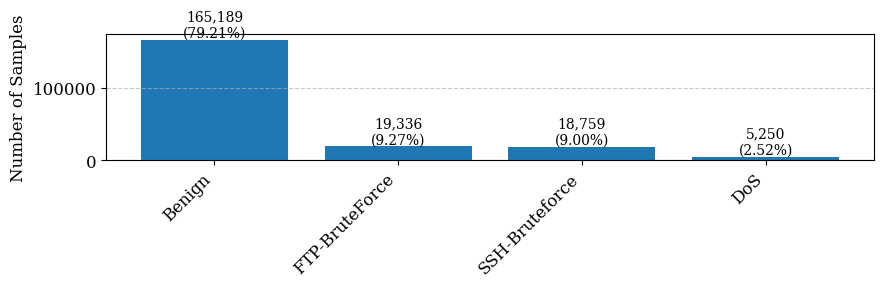

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is final_df

# Count samples and percentages
label_counts = df['Label'].value_counts()
label_percentages = (label_counts / label_counts.sum()) * 100

# Set up the plot
plt.figure(figsize=(9, 3))
bars = plt.bar(label_counts.index, label_counts.values)

# Add count and percentage text above each bar
for idx, bar in enumerate(bars):
    height = bar.get_height()
    count_text = f'{label_counts.values[idx]:,}'
    percent_text = f'({label_percentages.values[idx]:.2f}%)'

    plt.text(
        bar.get_x() + bar.get_width()/2, height + 0.01*height,
        f'{count_text}\n{percent_text}',
        ha='center', va='bottom', fontsize=10
    )

# Titles and labels
#plt.title('Drone IDS Dataset: Data Samples per Attack Type (Count & %)', fontsize=18)
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

## **Proposed TACNet Model for IDS**

In [ ]:
# ✅ Imports
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, BatchNormalization, Conv1D,
    GlobalMaxPooling1D, Concatenate, Bidirectional, GRU,
    Multiply, Permute, Lambda, Reshape, LSTM
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# ✅ Channel Attention Block (with Lambda wrapper)
def channel_attention(input_tensor, reduction_ratio=8):
    channel = input_tensor.shape[-1]
    avg_pool = Lambda(lambda x: tf.reduce_mean(x, axis=1, keepdims=True))(input_tensor)
    dense_1 = Dense(channel // reduction_ratio, activation='relu')(avg_pool)
    dense_2 = Dense(channel, activation='sigmoid')(dense_1)
    return Multiply()([input_tensor, dense_2])

# ✅ Temporal Attention Block
def temporal_attention(input_seq):
    permuted = Permute((2, 1))(input_seq)
    attention = Dense(input_seq.shape[1], activation='softmax')(permuted)
    attention = Permute((2, 1))(attention)
    return Multiply()([input_seq, attention])

# ✅ Multi-scale Temporal Convolution + LSTM
def multi_scale_lstm_block(input_seq):
    cnn3 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_seq)
    cnn5 = Conv1D(64, kernel_size=5, activation='relu', padding='same')(input_seq)
    cnn7 = Conv1D(64, kernel_size=7, activation='relu', padding='same')(input_seq)

    cnn_concat = Concatenate()([cnn3, cnn5, cnn7])
    cnn_concat = BatchNormalization()(cnn_concat)
    cnn_concat = Dropout(0.3)(cnn_concat)

    # Apply LSTM to capture temporal dependencies
    lstm_out = LSTM(128, return_sequences=True)(cnn_concat)

    return lstm_out

# ✅ TACNET Model Definition with Multi-Scale and LSTM Block
def TACNET(input_dim, num_classes):
    inputs = Input(shape=(input_dim,))
    x = Reshape((input_dim, 1))(inputs)

    # Multi-scale CNN + LSTM Block
    rnn_out = multi_scale_lstm_block(x)

    # Temporal Attention
    temporal_out = temporal_attention(rnn_out)

    # Channel Attention
    channel_out = channel_attention(temporal_out)

    # Global Pooling + Final Classifier
    pooled = GlobalMaxPooling1D()(channel_out)
    x = Dense(128, activation='relu')(pooled)
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# ✅ Load the Data (Assuming you already have the preprocessed dataframe 'df')
X = df.drop(columns=['Label']).astype('float32')
y = df['Label']

# ✅ Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

# ✅ Handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = dict(zip(np.unique(y_encoded), class_weights))

# ✅ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# ✅ Build the Updated Model
model = TACNET(input_dim=X.shape[1], num_classes=len(class_names))

# ✅ Compile Model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Callbacks (EarlyStopping and ModelCheckpoint)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_updated_cst_afnet_model.h5", save_best_only=True)

# ✅ Custom Callback to store additional metrics like Precision, Recall, F1 score
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_train, y_train, X_val, y_val):
        super(MetricsCallback, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.history = {'train_loss': [], 'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
                        'val_loss': [], 'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': []}

    def on_epoch_end(self, epoch, logs=None):
        # Training metrics
        y_train_pred = np.argmax(self.model.predict(self.X_train), axis=-1)
        train_precision = precision_score(self.y_train, y_train_pred, average='weighted')
        train_recall = recall_score(self.y_train, y_train_pred, average='weighted')
        train_f1 = f1_score(self.y_train, y_train_pred, average='weighted')

        # Validation metrics
        y_val_pred = np.argmax(self.model.predict(self.X_val), axis=-1)
        val_precision = precision_score(self.y_val, y_val_pred, average='weighted')
        val_recall = recall_score(self.y_val, y_val_pred, average='weighted')
        val_f1 = f1_score(self.y_val, y_val_pred, average='weighted')

        # Storing metrics in the history
        self.history['train_loss'].append(logs['loss'])
        self.history['train_accuracy'].append(logs['accuracy'])
        self.history['train_precision'].append(train_precision)
        self.history['train_recall'].append(train_recall)
        self.history['train_f1'].append(train_f1)
        self.history['val_loss'].append(logs['val_loss'])
        self.history['val_accuracy'].append(logs['val_accuracy'])
        self.history['val_precision'].append(val_precision)
        self.history['val_recall'].append(val_recall)
        self.history['val_f1'].append(val_f1)

# ✅ Training the Model with Custom Metrics Callback
metrics_callback = MetricsCallback(X_train, y_train, X_test, y_test)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=1024,
    callbacks=[early_stop, checkpoint, metrics_callback],
    class_weight=class_weight_dict,
    verbose=1
)

# ✅ Displaying the collected metrics after training
print("Training and Validation Metrics:")
print(f"Train Loss: {metrics_callback.history['train_loss']}")
print(f"Train Accuracy: {metrics_callback.history['train_accuracy']}")
print(f"Train Precision: {metrics_callback.history['train_precision']}")
print(f"Train Recall: {metrics_callback.history['train_recall']}")
print(f"Train F1 Score: {metrics_callback.history['train_f1']}")
print(f"Validation Loss: {metrics_callback.history['val_loss']}")
print(f"Validation Accuracy: {metrics_callback.history['val_accuracy']}")
print(f"Validation Precision: {metrics_callback.history['val_precision']}")
print(f"Validation Recall: {metrics_callback.history['val_recall']}")
print(f"Validation F1 Score: {metrics_callback.history['val_f1']}")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 79)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 79, 1)     │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 79, 64)    │        256 │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 79, 64)    │        384 │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 79, 64)    │        512 │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 79, 192)   │          0 │ conv1d_3[0][0],   │
│ (Concatenate)       │                   │            │ conv1d_4[0][0],   │
│                     │                   │            │ conv1d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 79, 192)   │        768 │ concatenate_1[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 79, 192)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 79, 128)   │    164,352 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_2 (Permute) │ (None, 128, 79)   │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128, 79)   │      6,320 │ permute_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_3 (Permute) │ (None, 79, 128)   │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_2          │ (None, 79, 128)   │          0 │ lstm_1[0][0],     │
│ (Multiply)          │                   │            │ permute_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 1, 128)    │          0 │ multiply_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1, 16)     │      2,064 │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1, 128)    │      2,176 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_3          │ (None, 79, 128)   │          0 │ multiply_2[0][0], │
│ (Multiply)          │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ multiply_3[0][0]  │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 128)       │     16,512 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 4)         │        516 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 193,860 (757.27 KB)

 Trainable params: 193,476 (755.77 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5388 - loss: 1.0162

5214/5214 ━━━━━━━━━━━━━━━━━━━━ 300s 57ms/step
   1/1304 ━━━━━━━━━━━━━━━━━━━━ 1:19 61ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1304/1304 ━━━━━━━━━━━━━━━━━━━━ 74s 56ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 887s 7s/step - accuracy: 0.5398 - loss: 1.0130 - val_accuracy: 0.7936 - val_loss: 1.1864
Epoch 2/20


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5214/5214 ━━━━━━━━━━━━━━━━━━━━ 298s 57ms/step
   1/1304 ━━━━━━━━━━━━━━━━━━━━ 1:27 67ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1304/1304 ━━━━━━━━━━━━━━━━━━━━ 76s 58ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 918s 7s/step - accuracy: 0.9304 - loss: 0.0906 - val_accuracy: 0.7930 - val_loss: 1.3816
Epoch 3/20


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9727 - loss: 0.0427

5214/5214 ━━━━━━━━━━━━━━━━━━━━ 297s 57ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 916s 7s/step - accuracy: 0.9727 - loss: 0.0426 - val_accuracy: 0.7899 - val_loss: 0.9733
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9870 - loss: 0.0208

5214/5214 ━━━━━━━━━━━━━━━━━━━━ 294s 56ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 866s 7s/step - accuracy: 0.9870 - loss: 0.0208 - val_accuracy: 0.9508 - val_loss: 0.1605
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9910 - loss: 0.0141

5214/5214 ━━━━━━━━━━━━━━━━━━━━ 296s 57ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 75s 58ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 920s 7s/step - accuracy: 0.9910 - loss: 0.0141 - val_accuracy: 0.9873 - val_loss: 0.0345
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9958 - loss: 0.0063

5214/5214 ━━━━━━━━━━━━━━━━━━━━ 298s 57ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 836s 6s/step - accuracy: 0.9958 - loss: 0.0063 - val_accuracy: 0.9947 - val_loss: 0.0159
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9960 - loss: 0.0064

5214/5214 ━━━━━━━━━━━━━━━━━━━━ 301s 58ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 74s 56ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 882s 7s/step - accuracy: 0.9960 - loss: 0.0064 - val_accuracy: 0.9952 - val_loss: 0.0115
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9954 - loss: 0.0075

5214/5214 ━━━━━━━━━━━━━━━━━━━━ 302s 58ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 855s 7s/step - accuracy: 0.9954 - loss: 0.0075 - val_accuracy: 0.9981 - val_loss: 0.0049
Epoch 9/20
5214/5214 ━━━━━━━━━━━━━━━━━━━━ 302s 58ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 74s 57ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 856s 6s/step - accuracy: 0.9974 - loss: 0.0040 - val_accuracy: 0.9986 - val_loss: 0.0052
Epoch 10/20
5214/5214 ━━━━━━━━━━━━━━━━━━━━ 299s 57ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 73s 56ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 829s 6s/step - accuracy: 0.9976 - loss: 0.0051 - val_accuracy: 0.9965 - val_loss: 0.0151
Epoch 11/20
5214/5214 ━━━━━━━━━━━━━━━━━━━━ 302s 58ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 851s 7s/step - accuracy: 0.9968 - loss: 0.0059 - val_accuracy: 0.9977 - val_loss: 0.0073
Epoch 12/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9984 - loss: 0.0028

5214/5214 ━━━━━━━━━━━━━━━━━━━━ 303s 58ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 859s 7s/step - accuracy: 0.9984 - loss: 0.0028 - val_accuracy: 0.9991 - val_loss: 0.0031
Epoch 13/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9988 - loss: 0.0019

5214/5214 ━━━━━━━━━━━━━━━━━━━━ 303s 58ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 870s 7s/step - accuracy: 0.9988 - loss: 0.0019 - val_accuracy: 0.9993 - val_loss: 0.0022
Epoch 14/20
5214/5214 ━━━━━━━━━━━━━━━━━━━━ 306s 59ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 847s 6s/step - accuracy: 0.9994 - loss: 0.0012 - val_accuracy: 0.9987 - val_loss: 0.0032
Epoch 15/20
5214/5214 ━━━━━━━━━━━━━━━━━━━━ 309s 59ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 868s 7s/step - accuracy: 0.9985 - loss: 0.0020 - val_accuracy: 0.9987 - val_loss: 0.0038
Epoch 16/20
5214/5214 ━━━━━━━━━━━━━━━━━━━━ 313s 60ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 881s 7s/step - accuracy: 0.9991 - loss: 0.0016 - val_accuracy: 0.9986 - val_loss: 0.0062
Epoch 17/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9990 - loss: 0.0013

5214/5214 ━━━━━━━━━━━━━━━━━━━━ 313s 60ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 923s 7s/step - accuracy: 0.9990 - loss: 0.0013 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 18/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9995 - loss: 9.3184e-04

5214/5214 ━━━━━━━━━━━━━━━━━━━━ 361s 69ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 85s 65ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 949s 7s/step - accuracy: 0.9995 - loss: 9.3177e-04 - val_accuracy: 0.9997 - val_loss: 0.0011
Epoch 19/20
5214/5214 ━━━━━━━━━━━━━━━━━━━━ 329s 63ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 919s 7s/step - accuracy: 0.9990 - loss: 0.0018 - val_accuracy: 0.9944 - val_loss: 0.0131
Epoch 20/20
5214/5214 ━━━━━━━━━━━━━━━━━━━━ 310s 59ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 75s 58ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 908s 7s/step - accuracy: 0.9939 - loss: 0.0112 - val_accuracy: 0.9951 - val_loss: 0.0108
Training and Validation Metrics:
Train Loss: [0.600645899772644, 0.07117918133735657, 0.035477425903081894, 0.01914655975997448, 0.015719948336482048, 0.005793656688183546, 0.005909302271902561, 0.007539198733866215, 0.0038046888075768948, 0.008385151624679565, 0.004838664550334215, 0.0026882956735789776, 0.0017623364692553878, 0.0016557537019

### **Accuracy, Loss, Precision, Recall**

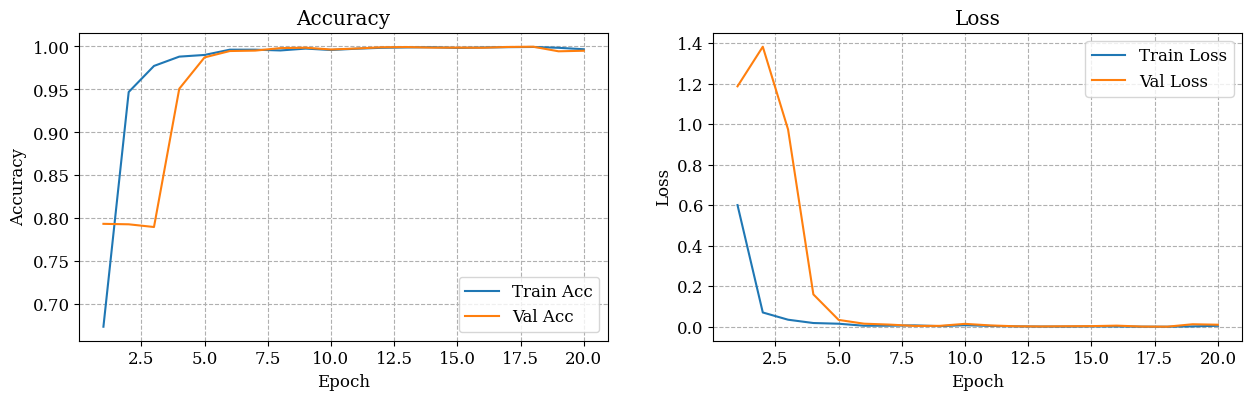

In [ ]:
import matplotlib.pyplot as plt

# === 6. PLOT METRICS ===
def plot_training_metrics(history):
    history_dict = history.history
    epochs = range(1, len(history_dict['loss']) + 1)

    plt.figure(figsize=(15, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_dict['accuracy'], label='Train Acc')
    plt.plot(epochs, history_dict['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(linestyle='--')  # Dashed grid

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['loss'], label='Train Loss')
    plt.plot(epochs, history_dict['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(linestyle='--')  # Dashed grid

# Plot training curves
plot_training_metrics(history)


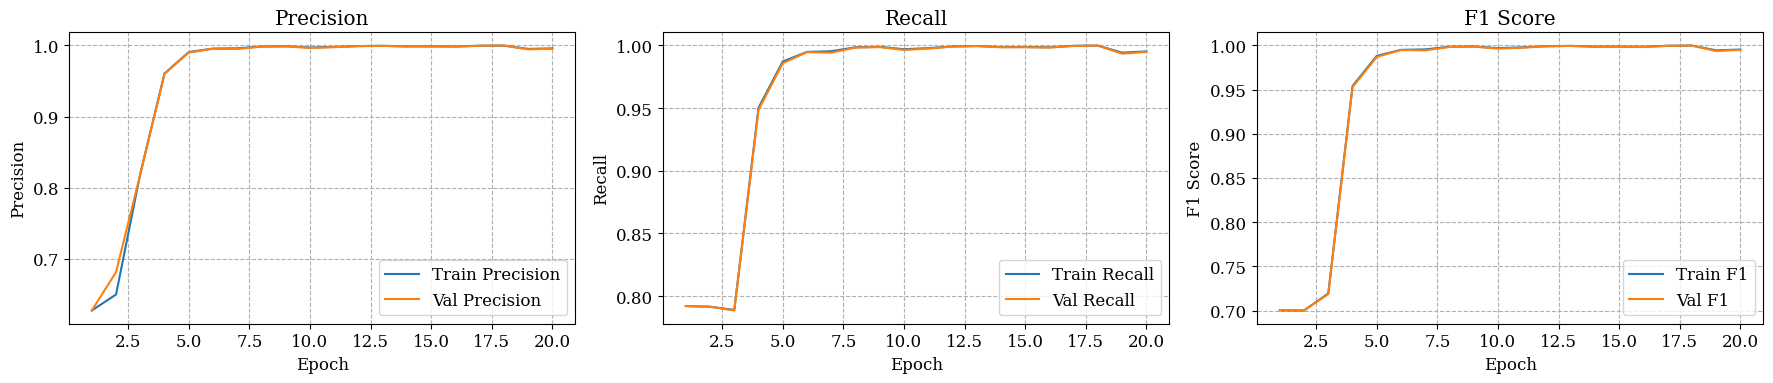

In [ ]:
# === 6. PLOT METRICS ===
def plot_training_metrics(history_obj, metrics_callback):
    # Extract metrics
    history_dict = history_obj.history
    epochs = range(1, len(history_dict['loss']) + 1)

    # === Plot Precision, Recall, F1 ===
    metrics = metrics_callback.history
    plt.figure(figsize=(18, 4))

    # Precision
    plt.subplot(1, 3, 1)
    plt.plot(epochs, metrics['train_precision'], label='Train Precision')
    plt.plot(epochs, metrics['val_precision'], label='Val Precision')
    plt.title('Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(linestyle='--')  # Dashed grid

    # Recall
    plt.subplot(1, 3, 2)
    plt.plot(epochs, metrics['train_recall'], label='Train Recall')
    plt.plot(epochs, metrics['val_recall'], label='Val Recall')
    plt.title('Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.grid(linestyle='--')  # Dashed grid

    # F1 Score
    plt.subplot(1, 3, 3)
    plt.plot(epochs, metrics['train_f1'], label='Train F1')
    plt.plot(epochs, metrics['val_f1'], label='Val F1')
    plt.title('F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(linestyle='--')  # Dashed grid

    plt.tight_layout()
    plt.show()

# ✅ Call the function to plot
plot_training_metrics(history, metrics_callback)


### **Classification Reports**

In [ ]:
from sklearn.metrics import classification_report

# Predict on training and validation data
y_train_pred = np.argmax(model.predict(X_train), axis=-1)
y_test_pred = np.argmax(model.predict(X_test), axis=-1)

# Generate the classification report for training data
print("Classification Report for Training Data:")
train_report = classification_report(y_train, y_train_pred, target_names=class_names, digits=4)
print(train_report)

# Generate the classification report for test data
print("\nClassification Report for Test Data:")
test_report = classification_report(y_test, y_test_pred, target_names=class_names, digits=4)
print(test_report)


5214/5214 ━━━━━━━━━━━━━━━━━━━━ 409s 78ms/step
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step
Classification Report for Training Data:
                precision    recall  f1-score   support

        Benign     1.0000    0.9998    0.9999    132151
           DoS     0.9931    0.9998    0.9964      4200
FTP-BruteForce     0.9997    1.0000    0.9999     15469
SSH-Bruteforce     1.0000    1.0000    1.0000     15007

      accuracy                         0.9998    166827
     macro avg     0.9982    0.9999    0.9990    166827
  weighted avg     0.9998    0.9998    0.9998    166827


Classification Report for Test Data:
                precision    recall  f1-score   support

        Benign     0.9999    0.9998    0.9998     33038
           DoS     0.9953    0.9981    0.9967      1050
FTP-BruteForce     0.9995    1.0000    0.9997      3867
SSH-Bruteforce     0.9997    1.0000    0.9999      3752

      accuracy                         0.9998     41707
     macro avg     0.9986    0.9995    0.

### **Confusion Matrix**

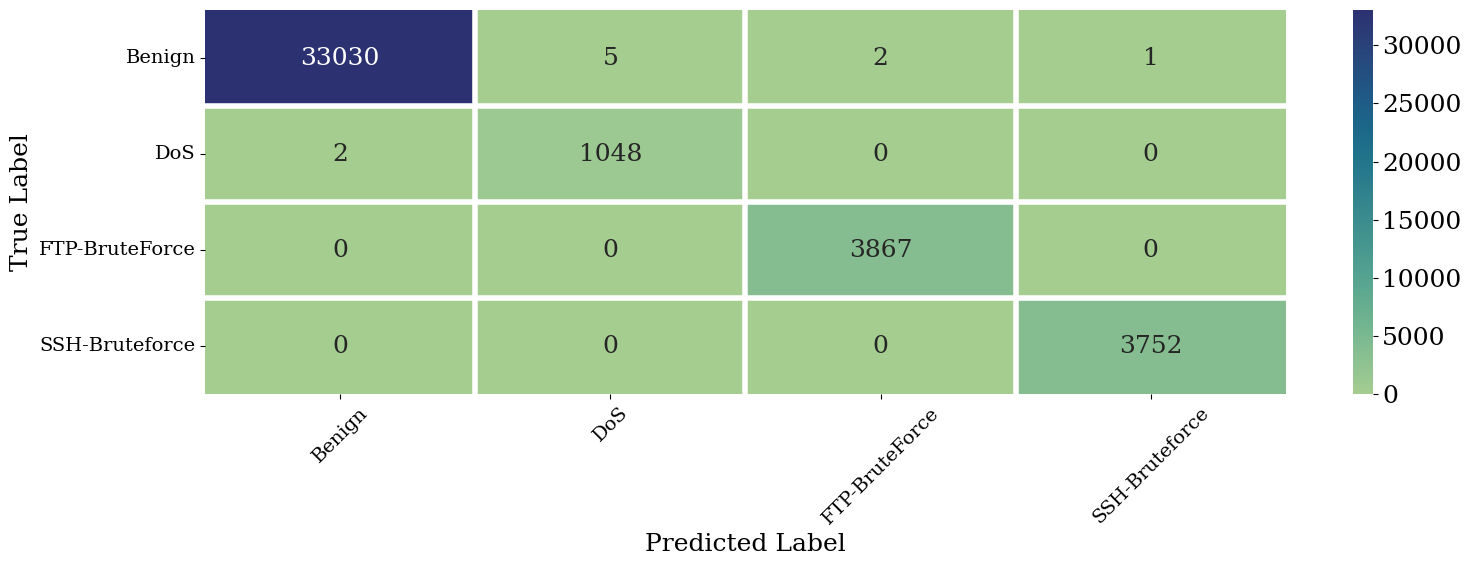

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set font properties globally (compatible with Google Colab)
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Step 1: Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Step 2: Get class labels from label encoder
#label_names = label_encoder.classes_

# Step 3: Create a plot for the confusion matrix
fig, ax = plt.subplots(figsize=(16, 6))

# Step 4: Define the color map
cmap = sns.color_palette("crest", as_cmap=True)

# Step 5: Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, ax=ax,
            xticklabels=class_names, yticklabels=class_names, annot_kws={"fontsize": 18})

# Step 6: Customize the plot
#ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

# Rotate tick labels
ax.set_xticklabels(class_names, rotation=45, fontsize=14)
ax.set_yticklabels(class_names, rotation=0, fontsize=14)

# Optional: Add white gridlines between heatmap cells
for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.hlines([i for i in range(1, len(class_names))], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([i for i in range(1, len(class_names))], *ax.get_ylim(), colors='white', linewidth=4)

# Final layout and display
plt.tight_layout()
plt.show()


### **ROC Curve**

1304/1304 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step


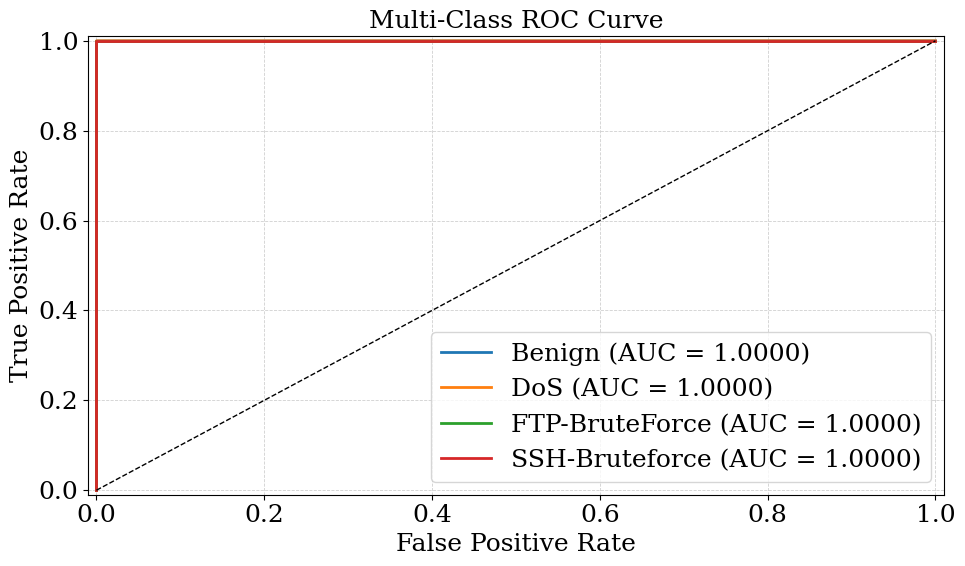

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# --- Setup and predictions ---
# Ensure y_test is in integer format, not one-hot
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Predict probabilities
y_pred_proba = model.predict(X_test)

# Binarize true labels for ROC computation
y_true_bin = label_binarize(y_true, classes=range(len(class_names)))

# --- Initialize ---
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 6))
colors = plt.get_cmap("tab10")

# --- ROC per class ---
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f"{class_names[i]} (AUC = {roc_auc[i]:.4f})",
             color=colors(i))

# --- Plot settings ---
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.tight_layout()
plt.show()


### **Per-Class Precision, Recall, and F1-Score**

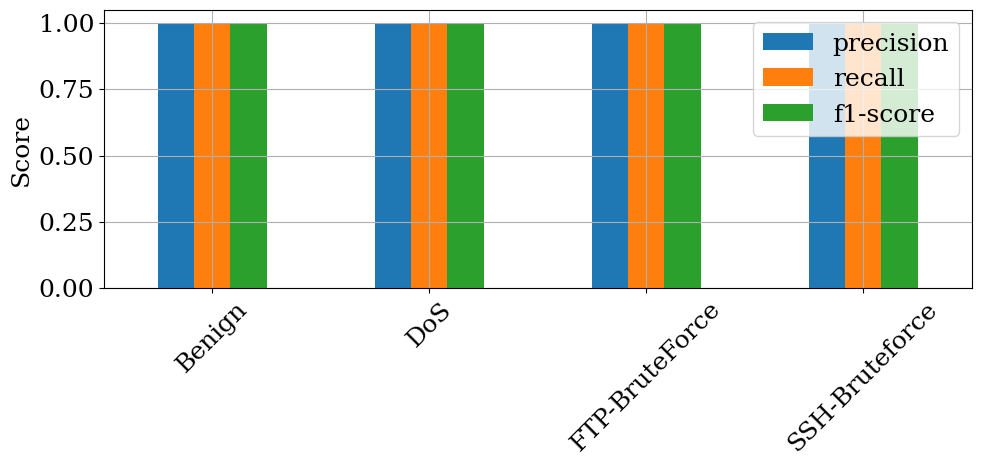

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Get detailed metrics
report_dict = classification_report(y_true, y_test_pred, target_names=class_names, output_dict=True)
df_metrics = pd.DataFrame(report_dict).T.iloc[:-3, :]  # remove avg/accuracy rows

df_metrics[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 5))
#plt.title("Per-Class Precision, Recall, and F1-Score")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## **Model Saving**

In [ ]:
model.save('/content/drive/MyDrive/CICIDS2018/model.h5')

print("Model saved to Google Drive in Keras format.")

Model saved to Google Drive in Keras format.


In [ ]:
model.save('/content/drive/MyDrive/CICIDS2018/FLUID-ID.h5')


In [ ]:
model.save('/content/drive/MyDrive/CICIDS2018/model2.keras')


# **Thank you Very Much**